In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

## First useing odeint function from scipy
http://scipy-cookbook.readthedocs.org/items/LoktaVolterraTutorial.html

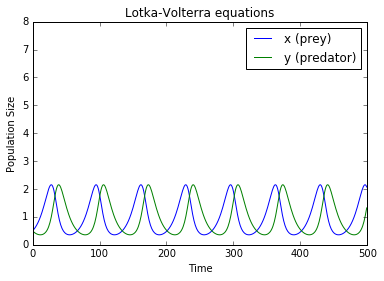

In [3]:
def LotkaVolterra(state, t):
    x = state[0]
    y = state[1]
    alpha = 0.1
    beta =  0.1
    sigma = 0.1
    gamma = 0.1
    xd = x*(alpha - beta*y)
    yd = -y*(gamma - sigma*x)
    
    return [xd,yd]

t = np.arange(0,500,1)
state0 = [0.5,0.5]

state = odeint(LotkaVolterra,state0,t)
plt.figure()
plt.plot(t,state)
plt.ylim([0,8])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('x (prey)','y (predator)'))
plt.title('Lotka-Volterra equations')
plt.show()

## Second approach is to use custom Forward Euler
https://en.wikipedia.org/wiki/Euler_method
The benefit of this approach is that you have full control of every time step. Good for realtime simulations.

In [4]:
time_steps = []
state0 = [0.5,0.5]
state = []

current_state = state0
state.append(current_state)

t = 0
time_steps.append(t)
dt = 0.01
while t < 500-1:
    t += dt
    current_state = current_state + dt * np.asarray(LotkaVolterra(current_state, t))
    
    state.append(current_state.tolist())
    time_steps.append(t)


In [5]:
print(len(state))
print(len(time_steps))

49902
49902


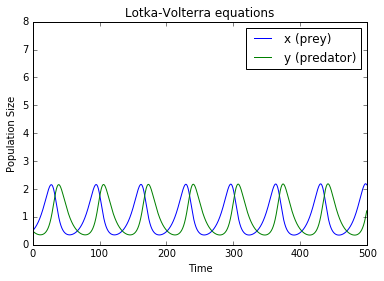

In [6]:
plt.figure()
plt.plot(time_steps, state)
plt.ylim([0,8])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('x (prey)','y (predator)'))
plt.title('Lotka-Volterra equations')
plt.show()

# Similar result. Hurra!